# Tutorial 2: Tensor Decompositions
This tutorial covers the basics of decomposing tensors into products of other tensors, including:    

- Special tensor types: diagonal, unitary, isometric tensors

- Use of singular value decomposition **'svd'** to decompose tensors

- Use of spectral decomposition **'eig'** to decompose tensors

- Use of QR decomposition **'qr'** to decompose tensors

- The Frobenius norm and optimal restricted rank tensor truncations

## T2.1: Special tensor types: diagonal, unitary, isometric 

We begin by considering some special types of tensor and the diagrammatic notation used to represent them:
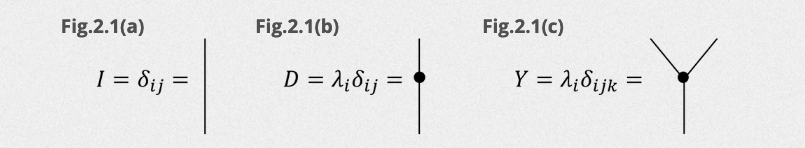
Fig.2.1(a) shows the identity tensor **$I$**, equivalent to the Kronecker delta function δij, which is simply depicted as a line. Fig.2.1(b) shows a diagonal matrix **$D$** with elements {λ1, λ2, …}, which is depicted as a small solid circle (in contrast to non-diagonal matrices, which are represented as larger or colored shapes). Fig.2.1(c) shows a higher order generalization of a diagonal tensor, again depicted as a small solid circle, which takes value λi if the indices match, i = j = k, and is zero otherwise.
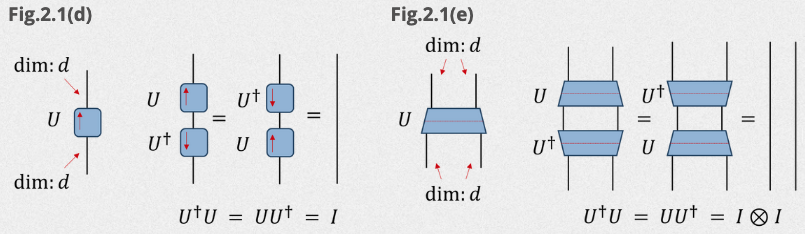
Fig.2.1(d) shows a **unitary** matrix **$U$**, which annihilates to the identity with its conjugate U† as depicted. We often draw the conjugate of a tensor with opposite vertical orientation (and here use arrows to explicitly denote tensor orientation for clarity). (e) We say that a tensor is unitary if there exists a bipartition of the indices (here denoted by the dotted line) under which the tensor could be reshaped into a unitary matrix. In many cases the shape of a tensor can be conveniently used to indicate its orientation, eliminating the need to use arrows for this purpose.
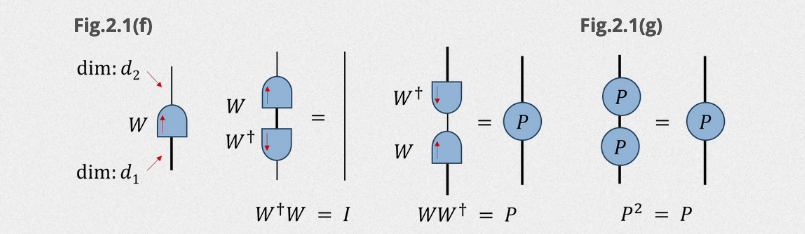

Fig.2.1(f) shows an **isometric** matrix **W**, where we have assumed that d1 > d2. When contracted on the larger dimensional index with its conjugate the identity is produced, **W†W = I**. However, contraction the other way, **WW† = P**, produces a **projector P**. A projector is a Hermitian tensor that squares to itself, as illustrated in Ex.2.1(g). These properties imply that the eigenvalues of a projector **P** must either be 0 or 1.
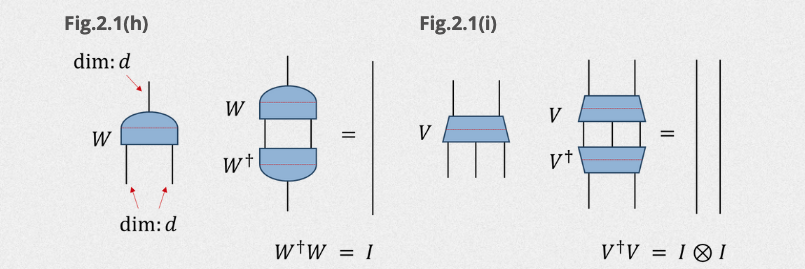
Fig.2.1(h-i) give examples of isometric tensors, which can be reshaped into isometric matrices under the partition indicated by the dotted lines, and the constraints that they satisfy.

 

**Diagrammatic conventions:** often a unitary tensor will be represented as a rectangle or trapezoid, where the longer dimension indicates the index partition under which it can be reshaped into a unitary matrix. Similarly, isometries are often represented as wedges which 'point' in the direction of the smaller dimension (i.e such that they annihilate to identity when contracted with their conjugate along the base of the wedge). These conventions allow one to indicate the partition of indices under which a tensor becomes isometric/unitary by its shape alone, eliminating the need to indicate these partitions explicitly. However, not all tensor network researchers follow these conventions.



## T2.2: Tensor decompositions


In this section we discuss how several common matrix decompositions, including the **singular value decomposition (SVD)**, the **spectral decomposition** and the **QR decomposition** are generalized to the case of tensors. These decompositions play a key role in many tensor network algorithms, particularly for their use in schemes to approximate a high-order tensor as a product of low-order tensors. 


We begin with the **SVD**, a widely used decomposition in many areas of mathematics, statistics, physics and engineering, which is defined for matrices of arbitrary dimension. Below are several examples:
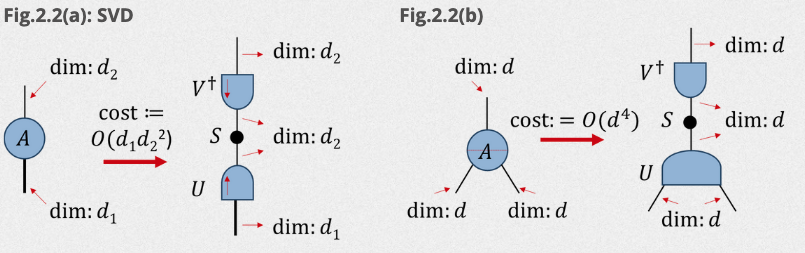


Fig.2.2(a) depicts the singular value decomposition of a d1×d2 matrix A (where we have assumed that d1 > d2) into a product of matrices, **A = USV†**. Here **U** is a d1×d2 isometric matrix, **V** is a d2×d2 unitary matrix, and S is a d2×d2 diagonal matrix with positive, real elements ordered with descending magnitude (called the **singular values**). The cost of performing the SVD scales the square of the smaller matrix dimension times the larger dimension, i.e. as **O(d1d2^2)**. Here we are using the 'economical' or 'thin' form of SVD, otherwise the 'full' SVD would give both U and V as unitary matrices and S as a d1×d2 diagonal matrix that is padded with zeros on the larger dimension.

 

Fig.2.2(b) depicts the SVD of a order-3 tensor **A** across the partition of indices specified by the dotted line. After using the appropriate 'reshape' commands the decomposition proceeds similarly to the previous example, except that tensor **U** is reshaped into a order-3 isometry.


**Aside:**

- the SVD is also useful for generating random unitary and isometric tensors as shown here on the left.

In [1]:
import numpy as np
from numpy import linalg as LA
from ncon import ncon
##### Ex2.2(a): SVD of matrix
d1 = 10; d2 = 6
A = np.random.rand(d1,d2)
[U,S,Vh] = LA.svd(A,full_matrices=False)
# check result
Af = U @ np.diag(S) @ Vh
dA = LA.norm(Af-A) 

In [2]:
##### Ex2.2(b): SVD of tensor
d = 10; A = np.random.rand(d,d,d)
Am = A.reshape(d**2,d)
Um,Sm,Vh = LA.svd(Am,full_matrices=False)
U = Um.reshape(d,d,d); S = np.diag(Sm)
# check result
Af = ncon([U,S,Vh],[[-1,-2,1],[1,2],[2,-3]])
dA = LA.norm(Af-A)

In [3]:
##### Initialize unitaries and isometries
d1 = 10; d2 = 6;

# d1-by-d1 random unitary matrix U
U,_,_ = LA.svd(np.random.rand(d1,d1))
# d1-by-d2 random isometric matrix W
A = np.random.rand(d1,d2);
W,_,_ = LA.svd(A,full_matrices=False)

The **spectral decomposition**(or eigen-decomposition) is a particularly useful decomposition for  Hermitian matrices or tensors where we desire that the decomposition explicitly reserves the Hermtian character. Below are several examples: 
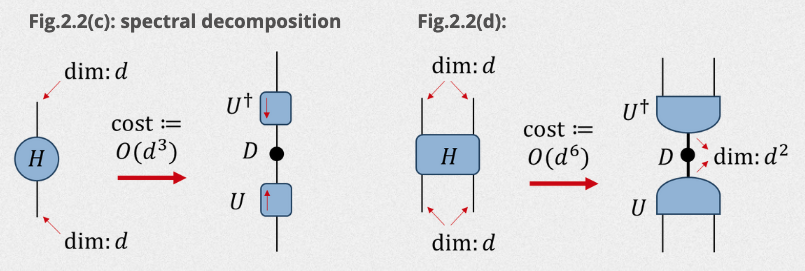
Fig.2.2(c) depicts the spectral decomposition (or eigen-decomposition) of a d×d Hermitian matrix **H** into a product of matrices, **H = UDU†**. Here U is a d×d unitary matrix and D is a d×d diagonal matrix of **the eigenvalues of H**. The cost of performing the spectral decomposition scales as **O(d^3)**. Fig.2.2(d) depicts the spectral decomposition of a order-4 tensor **H**, which is assumed to be Hermitian w.r.t. its top vs bottom indices. After using the appropriate 'reshape' commands the decomposition proceeds similarly to the previous example, except that the number of eigenvalues is now the product of the indices on each side of **H**, and the tensor **U** is reshaped into a order-3 isometry.

In [4]:
##### Ex2.2(c): spect. decomp. of matrix
d = 10; A = np.random.rand(d,d)
H = 0.5*(A + A.T) #random Hermitian
D,U = LA.eigh(H)
# check result
Hf = U @ np.diag(D) @ U.T
dH = LA.norm(Hf-H)

In [5]:
##### Ex2.2(d): spect. decomp. of tensor
d = 2; A = np.random.rand(d,d,d,d)
H = 0.5*(A + A.transpose(2,3,0,1))
D,U = LA.eigh(H.reshape(d**2,d**2))
U = U.reshape(d,d,d**2)
# check result
Hf = ncon([U,np.diag(D),U],
           [[-1,-2,1],[1,2],[-3,-4,2]])
dH = LA.norm(Hf-H)

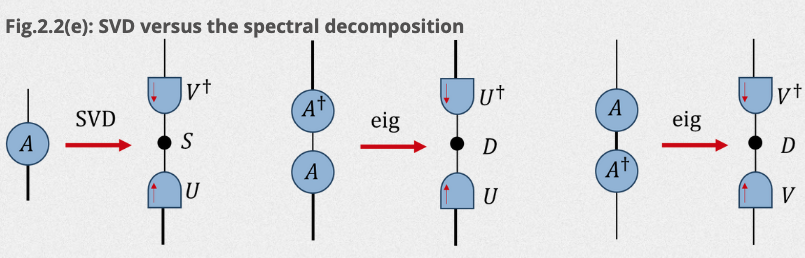

**Aside**: For any matrix **A** the spectral decompositions of **AA†** and **A†A** are related to the SVD of **A** as depicted in Fig.2.2(e). More precisely, the eigenvectors **U** of **AA†** and **V** of **A†A** (trimmed to remove contributions from trivial eigenvalues) are equal to the singular vectors contained in **U** and **V** from the SVD, and the (non-zero) eigenvalues in **D** are the squares of the singular values in **S**. 

The final decomposition we consider is the QR decomposition which is useful to orthogonalize a tensor network, as will be discussed later in Tutorial 3.
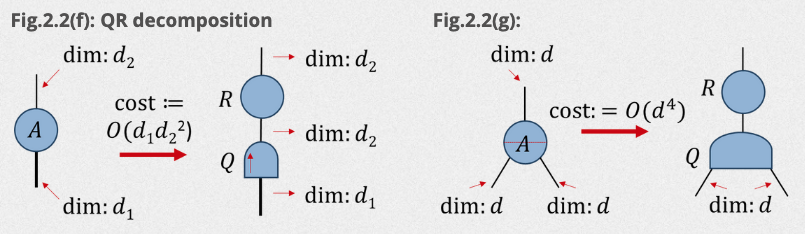

Fig.2.2(f) depicts the QR decomposition of a d1×d2 matrix A (where we have assumed that d1 > d2) into a product of matrices, A = QR. Here Q is a d1×d2 isometric matrix and R is a d2×d2 upper-triangular matrix. The cost of performing the QR scales as O(d1d2^2), which is the same as the SVD, although the QR decomposition tends to be faster in practice by a constant factor. Here we are using the so-called 'economical' QR decomposition, otherwise the 'full' QR would give both Q as a d1×d1 unitary matrix and would pad R with zeros. Fig.2.2(g) depicts the QR decomposition of a order-3 tensor A across the partition of indices specified by the dotted line. The decomposition proceeds similarly to the previous example, except that tensor Q is reshaped into a order-3 isometry.

In [6]:
##### Ex2.2(f): QR decomp of matrix
d1 = 10; d2 = 6
A = np.random.rand(d1,d2)
Q,R = LA.qr(A)
# check result
Af = Q @ R
dA = LA.norm(Af-A)

In [7]:
##### Ex2.2(g): QR decomp of tensor
d = 10
A = np.random.rand(d,d,d)
Qm,R = LA.qr(A.reshape(d**2,d))
Q = Qm.reshape(d,d,d)
# check result
Af = ncon([Q,R],[[-1,-2,1],[1,-3]]);
dA = LA.norm(Af-A)

## T2.3: Frobenius norm for tensors

The matrix decompositions in the previous section are useful for approximating a single tensor as a product multiple tensors. However, before discussing such approximations it is necessary to define the tensor norm that we use. A tensor norm that is particular useful for us is the Frobenius norm (or Hilbert-Schmidt norm). Given a matrix Aij the norm ‖A‖ is defined as the square-root of the sum of the magnitude of each element squared:
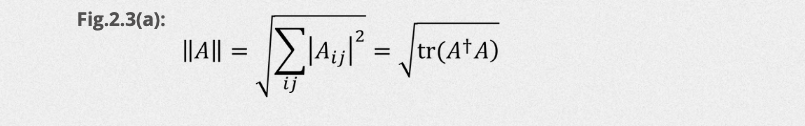

The generalization of the Frobenius norm to tensors with order > 2 is very straight-forward; one could either extend the summation in Ex.2.3(a) to include all indices or replace the trace tr with a tensor trace Ttr as illustrated below:
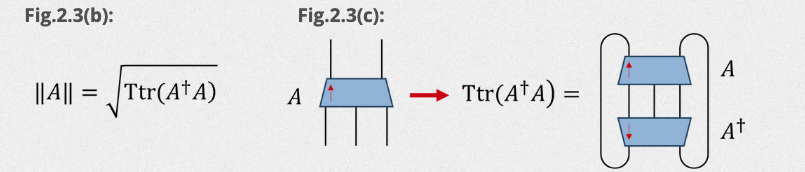


In [8]:
##### Ex2.3(c)
d = 10; A = np.random.rand(10,10,10,10,10)
# frobenus norm
cvec = [k+1 for k in range(np.ndim(A))]
frobA0 = np.sqrt(ncon([A,np.conj(A)],[cvec,cvec]))
# equivalent frobenus norm
frobA1 = np.sqrt(sum(abs(A.flatten())**2))
# also equivalent frobenus norm
frobA2 = LA.norm(A)

Fig.2.3(c) depicts the tensor trace Ttr of tensor A, which is the product of A and its conjugate A† where all matching indices are contracted. A useful property of the Frobenius norm is that it has a simple expression in terms of the singular values of a tensor. Let A be a tensor whose singular values across some chosen partition are {s1, s2, s2,...}, as depicted in Fig.2.3(d), then it follows that Ttr(AA†) is simply the square root of the sum of the singular values squared:  
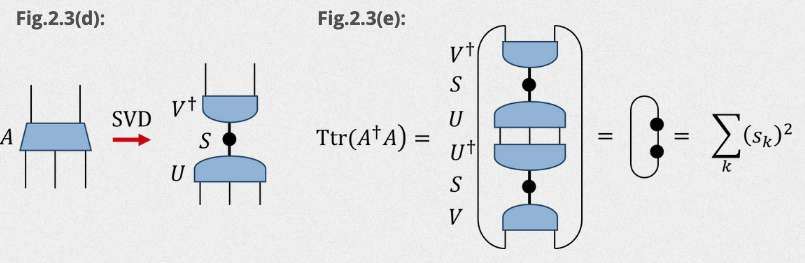

Following Fig.2.3(e) this results in a simple expression for the Frobenius norm as shown on the below:
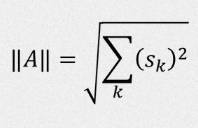

Let us assume that we wish to approximate some tensor A with another tensor B of equal size. It is useful to define the error of approximation ε as the difference between the tensors in the Frobenius norm divided by the norm of A: 
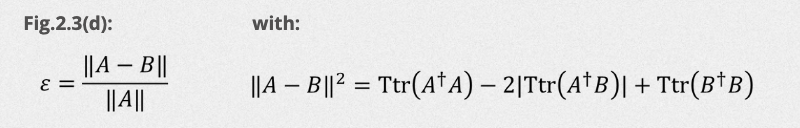

# T2.4: Restricted rank tensor approximations

Given some tensor A and some bi-partition of its indices, we define the decomposition rank r as the minimal internal dimension such that A can be expressed as a product of tensors, A = B ⋅ C, across this partition (i.e. rank r is the dimension of the index contracted between B and C). Although we will not prove this here, it can be shown that the decomposition rank r of tensor A across a partition precisely equals the number of non-zero singular values in the SVD across the partition. 


A useful application of the singular value decomposition is that it allows one to find the optimal restricted rank approximation to a tensor. Given a tensor A that has decomposition rank r with respect to some specified partition of its indices, let us assume that we wish to find an equivalent sized tensor B of reduced rank, χ < r, that best approximates A (i.e. that minimizes the difference Frobenius norm difference ε in Fig.2.3(d)). The factorization that minimizes the truncation error ε can be obtained directly from the SVD of A by simply 'trimming' the smallest singular values and truncating the U and V matrices accordingly. This is demonstrated below by approximating order-5 tensor A with an order-5 tensor B that has rank χ = 8 across the partition indicated, using the truncated SVD:
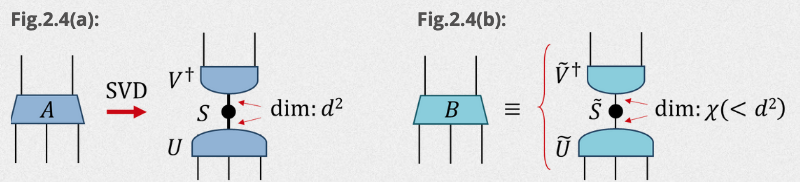



In [9]:
##### Ex2.4(a): SVD
d = 10; A = np.random.rand(d,d,d,d,d)
Um,S,Vhm = LA.svd(A.reshape(d**3,d**2),full_matrices=False)
U = Um.reshape(d,d,d,d**2)
Vh = Vhm.reshape(d**2,d,d)
##### truncation
chi = 8;
Vhtilda = Vh[:chi,:,:]
Stilda = np.diag(S[:chi])
Utilda = U[:,:,:,:chi]
B = ncon([Utilda,Stilda,Vhtilda],[[-1,-2,-3,1],[1,2],[2,-4,-5]])
##### compare
epsAB = LA.norm(A-B) / LA.norm(A)


Following Fig.2.4(a), the truncation error ε of the optimal restricted rank approximation is simply given as the square-root of the sum of the squares of the discarded singular values, as shown on the below (assuming that the starting tensor was properly normalized, ‖A‖ = 1).  
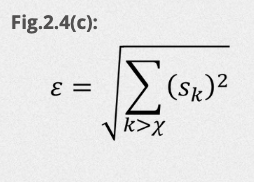


A useful concept is the effective rank to accuracy Δ of a tensor, denoted as r(Δ), which is defined as the number of singular values greater than or equal to Δ across the decomposition. In many cases (particularly if the spectrum of singular values is sharply decaying) then the error ε in truncating a tensor to rank r(Δ) will be ε ≈ Δ, since the expression Fig.2.4(c) will be dominated by the largest singular value that is truncated. Thus the value Δ often serves as a useful proxy for the true truncation error ε.

In [10]:
##### Ex2.4(d): effective rank
# Generate toeplitz matrix
d = 500;
A = (np.diag(np.ones(d-1),-1) + 
     np.diag(np.ones(d-1), 1))
A = A / LA.norm(A) #normalize

# compute effective rank to accuracy 'deltaval'
deltaval = 1e-2
Um, Sm, Vhm = LA.svd(A)
r_delta = sum(Sm > deltaval)
eps_err = np.sqrt(sum(Sm[r_delta:]**2))


In Ex.2.4(d) we generate a Toeplitz matrix A and compute the effective rank at accuracy Δ = 1e-2, which evaluates to r(Δ = 1e-2) = 450. We then compute the truncation error of the restricted rank approximation, which is found to be ε ≈ 4e-2.

**Aside**: Notice also that if a tensor H was Hermitian and positive semi-definite w.r.t the index partition, then one could obtain the optimal restricted rank approximation via the spectral decomposition by truncating the smallest weight eigenvalues. This follows from the relationship between the eigenvalues and singular values of matrices as discussed in Fig.2.2(e). The factorization given from the spectral decomposition can be more useful than that from the SVD in this context, as the former explicitly preserves the Hermitian character of H, although in principle both decompositions would have the same accuracy ε.

**Outlook: Tensor Decompositions**

Optimal restricted rank tensor approximations, obtained via the SVD or the spectral decomposition, play a central role in tensor network theory and are also essential ingredients to most tensor network algorithms. In fact, most common tensor network algorithms are simply composed of some combination of contraction steps, as discussed in Tutorial 1, together with some combination of tensor decompositions. Thus we have already learned the foundational tools of tensor network methods! Subsequent tutorials will discuss how these tools can be applied and composed into algorithms for certain tasks...

## Problem Set 2:

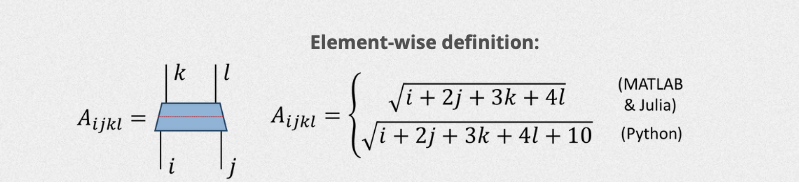

Pb.2: Tensor A is an order-4 tensor that we define element-wise as given above. Note that the difference between the MATLAB/Julia and Python definitions follows from the use of 1-based indexing in the former versus the use 0-based indexing in the latter, but it is still the same tensor between all three programming languages.


**(a)** Assume that indices i, j are of dimension d1 and indices k, l are of dimension d2 (with d2 < d1). How does the cost of taking the SVD across the indicated partition scale with d1 and d2?


**(b)** Generate the tensor A for d1 = 10 and d2 = 8. What is the norm ‖A‖? After computing the norm construct the normalized tensor: A' = A / ‖A‖.


**(c)** Take the SVD of A' across the indicated partition. Check that the square root of the sum of the singular values squared is equal to 1. Why is this the case?


**(d)** What is the effective rank r(Δ) of A' at Δ = 1e-4 ?


**(e)** Compute the truncation error ε of the restricted rank approximation r(Δ=1e-4) indirectly using the singular values as per Fig.2.4(c)


**(f)** Construct the optimal restricted rank approximation to A' via the truncated SVD. Compute the truncation error ε of this approximation and check that your answer is consistent with part (e).